In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

# Set visualisation styles
sns.set(style="whitegrid")


In [14]:
# Load the dataset
data = pd.read_excel("C:\\Users\\nadew\\Downloads\\Data-20241222T074727Z-001\\Data\\Week2_challenge_data_source.xlsx")

# Display the first few rows of the dataset
print(data.head())


              Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0   9164566995485190  ...          15854611.0           2501332.0

In [15]:
#top 10 handset types
top_handsets = data['Handset Type'].value_counts().head(10)
print(top_handsets)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


###top 10 HANDSET TYPES in graph explained###

C:\Users\nadew\AppData\Local\Temp\ipykernel_8392\1800973845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_handsets.index, y=top_handsets.values, palette='viridis')


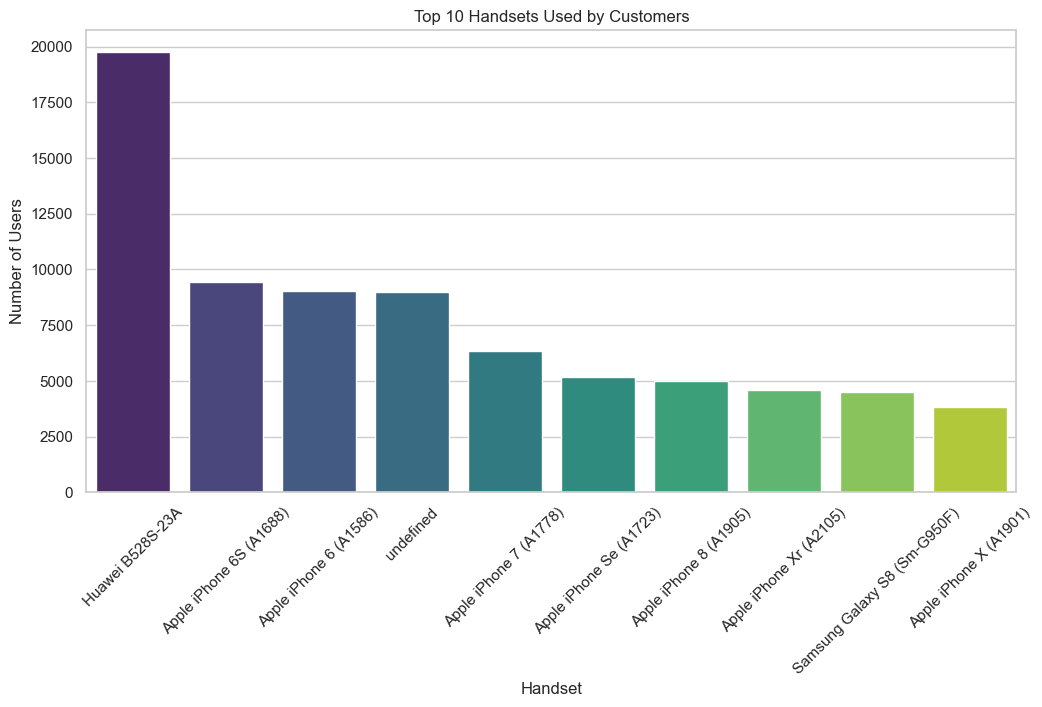

In [16]:

# Plotting the top handsets
plt.figure(figsize=(12, 6))
sns.barplot(x=top_handsets.index, y=top_handsets.values, palette='viridis')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handset')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()



*top 3 Handset Manufacturers

In [17]:
# Identify the top 3 handset manufacturers
top_manufacturers = data['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:")

print(top_manufacturers)


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [18]:
# Identify the top 5 handsets per top 3 manufacturers
top_5_handsets_per_manufacturer = {}
for manufacturer in top_manufacturers.index:
    handsets = data[data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturer] = handsets

print("Top 5 Handsets per Top 3 Manufacturers:")
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\n{manufacturer}:")
    print(handsets)


Top 5 Handsets per Top 3 Manufacturers:

Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [19]:
for col in data.columns:
 if data[col].isnull().sum() > 0:
            if data[col].dtype in ['int64', 'float64']:
                data[col].fillna(data[col].mean(), inplace=True)
            else:
                data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\nadew\AppData\Local\Temp\ipykernel_8392\1196987126.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\nadew\AppData\Local\Temp\ipykernel_8392\1196987126.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

checking for outliers

In [20]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(outliers)

Empty DataFrame
Columns: [Bearer Id, Start, Start ms, End, End ms, Dur. (ms), IMSI, MSISDN/Number, IMEI, Last Location Name, Avg RTT DL (ms), Avg RTT UL (ms), Avg Bearer TP DL (kbps), Avg Bearer TP UL (kbps), TCP DL Retrans. Vol (Bytes), TCP UL Retrans. Vol (Bytes), DL TP < 50 Kbps (%), 50 Kbps < DL TP < 250 Kbps (%), 250 Kbps < DL TP < 1 Mbps (%), DL TP > 1 Mbps (%), UL TP < 10 Kbps (%), 10 Kbps < UL TP < 50 Kbps (%), 50 Kbps < UL TP < 300 Kbps (%), UL TP > 300 Kbps (%), HTTP DL (Bytes), HTTP UL (Bytes), Activity Duration DL (ms), Activity Duration UL (ms), Dur. (ms).1, Handset Manufacturer, Handset Type, Nb of sec with 125000B < Vol DL, Nb of sec with 1250B < Vol UL < 6250B, Nb of sec with 31250B < Vol DL < 125000B, Nb of sec with 37500B < Vol UL, Nb of sec with 6250B < Vol DL < 31250B, Nb of sec with 6250B < Vol UL < 37500B, Nb of sec with Vol DL < 6250B, Nb of sec with Vol UL < 1250B, Social Media DL (Bytes), Social Media UL (Bytes), Google DL (Bytes), Google UL (Bytes), Email DL (

In [21]:
import numpy as np

fixing the outliers


In [24]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = np.where(data[col] < lower_bound, data[col].mean(), data[col])
        data[col] = np.where(data[col] > upper_bound, data[col].mean(), data[col])
print(outliers)

Empty DataFrame
Columns: [Bearer Id, Start, Start ms, End, End ms, Dur. (ms), IMSI, MSISDN/Number, IMEI, Last Location Name, Avg RTT DL (ms), Avg RTT UL (ms), Avg Bearer TP DL (kbps), Avg Bearer TP UL (kbps), TCP DL Retrans. Vol (Bytes), TCP UL Retrans. Vol (Bytes), DL TP < 50 Kbps (%), 50 Kbps < DL TP < 250 Kbps (%), 250 Kbps < DL TP < 1 Mbps (%), DL TP > 1 Mbps (%), UL TP < 10 Kbps (%), 10 Kbps < UL TP < 50 Kbps (%), 50 Kbps < UL TP < 300 Kbps (%), UL TP > 300 Kbps (%), HTTP DL (Bytes), HTTP UL (Bytes), Activity Duration DL (ms), Activity Duration UL (ms), Dur. (ms).1, Handset Manufacturer, Handset Type, Nb of sec with 125000B < Vol DL, Nb of sec with 1250B < Vol UL < 6250B, Nb of sec with 31250B < Vol DL < 125000B, Nb of sec with 37500B < Vol UL, Nb of sec with 6250B < Vol DL < 31250B, Nb of sec with 6250B < Vol UL < 37500B, Nb of sec with Vol DL < 6250B, Nb of sec with Vol UL < 1250B, Social Media DL (Bytes), Social Media UL (Bytes), Google DL (Bytes), Google UL (Bytes), Email DL (

DATA CLEANING HAS BEEN COMPLETE